## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0, 20)
y = (-2 * X) + 1

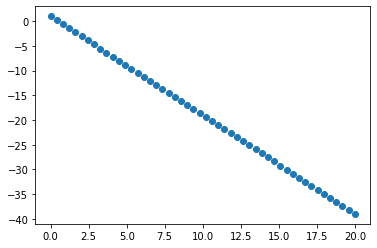

In [125]:
plt.scatter(X, y);

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def gd_single(X, y, alpha, iterations):
    m = len(y)
    J = []
    theta_0 = 0
    theta_1 = 0
    theta1 = []
    theta0 = []
    old_cost = 0
    counter = 0
    hyp_list = []
    for _ in range(iterations):
        hyp = theta_0 + (theta_1 * X)
        hyp_list.append(hyp)
        error = hyp - y
        new_cost = sum((error**2)) / (2 * m)
        J.append(new_cost)
        gradient0 = (1/m) * np.sum(error)
        gradient1 = (1/m) * np.sum(error * X)
        theta_0 = theta_0 - (alpha * gradient0)
        theta_1 = theta_1 - (alpha * gradient1)
        theta0.append(theta_0)
        theta1.append(theta_1)
        if abs(old_cost - new_cost ) < 1e-3:
            break
        old_cost = new_cost
        counter += 1
    return J, theta0, theta1, theta_0, theta_1, counter, hyp_list

#### Try your function with any input parameterss of your choice.

In [5]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list = gd_single(X, y, 0.001, 1000)
counter

40

#### Calculate r2 score

In [7]:
r2_score(y, hyp_list[-1])

0.9975950054190024

#### Plot loss vs. epochs

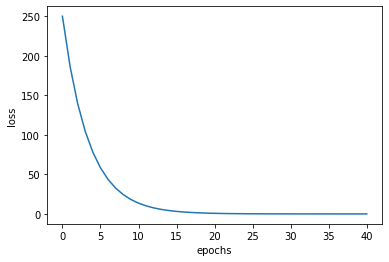

In [8]:
plt.plot(J)
plt.xlabel("epochs")
plt.ylabel("loss");

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

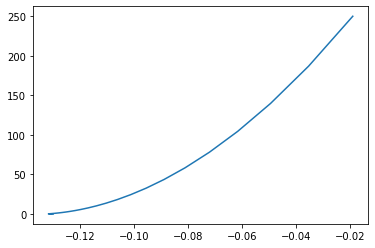

In [9]:
plt.plot(theta0_list, J)

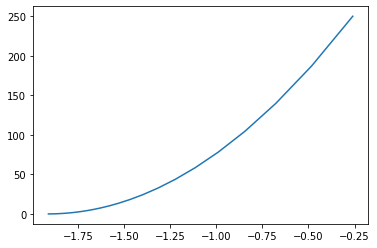

In [10]:
plt.plot(theta1_list, J)

#### Plot all regression lines till converge

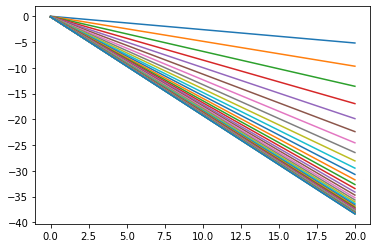

In [11]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.show()

#### Plot the best regression line

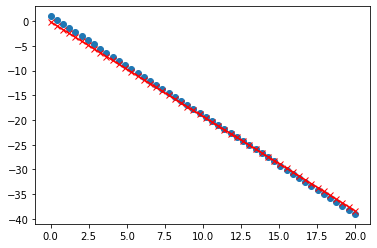

In [12]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [13]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list = gd_single(X, y, 0.0001, 10000)
counter

325

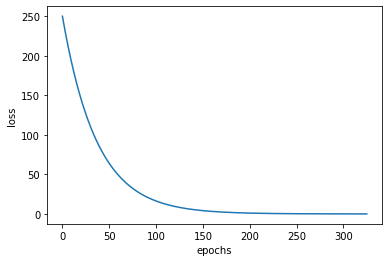

In [14]:
plt.plot(J)
plt.xlabel("epochs")
plt.ylabel("loss");

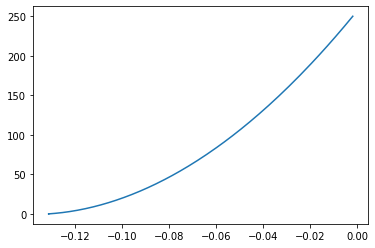

In [15]:
plt.plot(theta0_list, J)

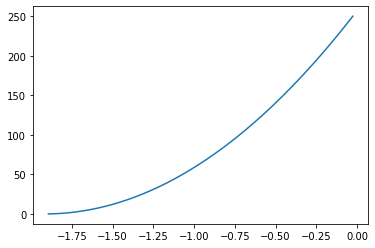

In [16]:
plt.plot(theta1_list, J)

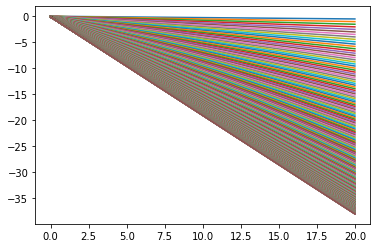

In [17]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.show()

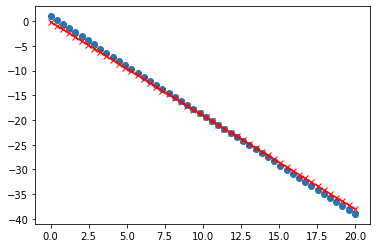

In [18]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [127]:
def gd_mini_batch(X, y, alpha, iterations, batch_size):
    theta_0 = 0
    theta_1 = 0
    theta0_list = []
    theta1_list = []
    J = []
    hyp_list = []
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        for i in range(0, len(X), batch_size):

            x_batched = X[i : i + batch_size]
            y_batched = y[i : i + batch_size]

            hyp = theta_0 + (theta_1 * x_batched)
            hyp_list.append(hyp)
            error = hyp - y_batched
            cost = (1/len(x_batched)) * np.sum((error)**2)
            J.append(cost)

            gradient0 = (1/len(x_batched)) * sum(error)
            gradient1 = (1/len(x_batched)) * sum(error * x_batched)

            theta_0 = theta_0 - (alpha * gradient0)
            theta0_list.append(theta_0)
            theta_1 = theta_1 - (alpha * gradient1)
            theta1_list.append(theta_1)
            if abs(old_cost - cost) < 1e-3:
                break
            old_cost = cost
            counter += 1
    return J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter

In [128]:
J, theta0_list, theta1_list, theta_0, theta_1, hyp_list, counter = gd_mini_batch(X, y, 0.001, 1000, 5)
counter

8383

In [129]:
y_predict = theta_0 + (theta_1 * X)
r2_score(y, y_predict)

0.9999483473397968

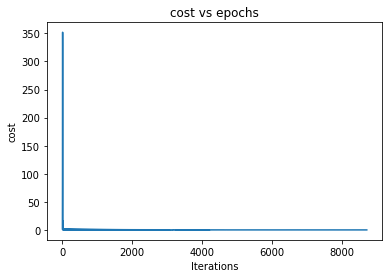

In [130]:
plt.plot(J)
plt.title("cost vs epochs")
plt.xlabel("Iterations")
plt.ylabel("cost");

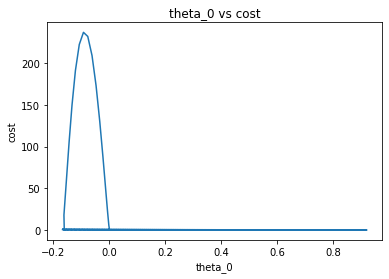

In [118]:
plt.plot(theta0_list, J)
plt.title("theta_0 vs cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

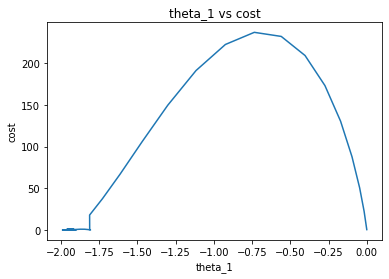

In [119]:
plt.plot(theta1_list, J)
plt.title("theta_1 vs cost")
plt.xlabel("theta_1")
plt.ylabel("cost");

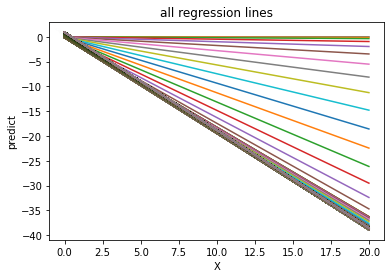

In [121]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("all regression lines")
plt.xlabel("X")
plt.ylabel("predict");

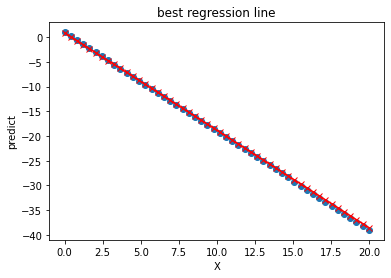

In [123]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("best regression line")
plt.xlabel("X")
plt.ylabel("predict");

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [96]:
def gd_SGD(X, y, alpha, iterations):
    m = len(y)
    J = []
    theta_0 = 0
    theta_1 = 0
    theta1 = []
    theta0 = []
    hyp_list = []
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        for i in range(0, len(X)):
            hyp = theta_0 + (theta_1 * X[i])
            hyp_list.append(hyp)
            error = hyp - y[i]
            cost = error**2
            J.append(cost)
            gradient0 = error * 2
            gradient1 = (error * X[i]) * 2
            theta_0 = theta_0 - (alpha * gradient0)
            theta_1 = theta_1 - (alpha * gradient1)
            theta0.append(theta_0)
            theta1.append(theta_1)
            if abs(old_cost - cost) < 1e-3:
                break
            old_cost = cost
            counter += 1
    return J, theta0, theta1, theta_0, theta_1, counter, hyp_list, counter

In [97]:
J, theta0_list, theta1_list, theta_0, theta_1, counter, hyp_list, counter = gd_SGD(X, y, 0.01, 1000)
counter

615

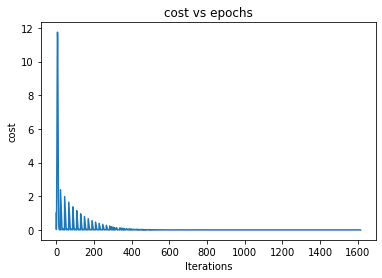

In [106]:
plt.plot(J)
plt.title("cost vs epochs")
plt.xlabel("Iterations")
plt.ylabel("cost");

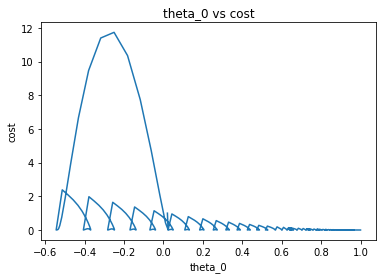

In [107]:
plt.plot(theta0_list, J)
plt.title("theta_0 vs cost")
plt.xlabel("theta_0")
plt.ylabel("cost");

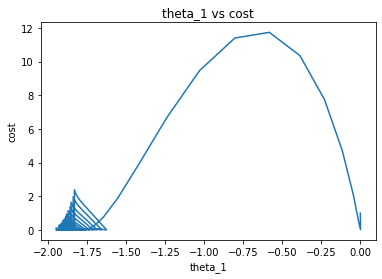

In [108]:
plt.plot(theta1_list, J)
plt.title("theta_1 vs cost")
plt.xlabel("theta_1")
plt.ylabel("cost");

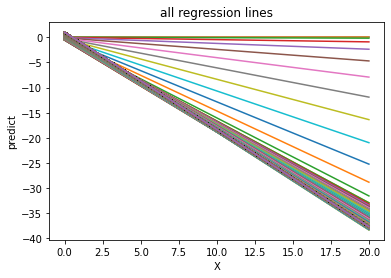

In [110]:
for i in range(0, len(theta0_list)):
    hyp = theta0_list[i] + (theta1_list[i] * X)
    plt.plot(X, hyp)
plt.title("all regression lines")
plt.xlabel("X")
plt.ylabel("predict");

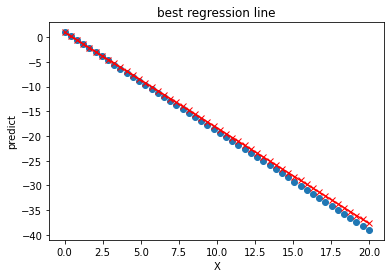

In [111]:
plt.scatter(X, y)
hyp = theta0_list[-1] + (theta1_list[-1] * X)
plt.plot(X, hyp, c='r', marker='x')
plt.title("best regression line")
plt.xlabel("X")
plt.ylabel("predict");